We can prove that under assumption $ (H): \rho(|| \Phi ||) < 1, $ the norm kernel matrix satisfies the following equation $$ (C): || \Phi || = I - \Sigma^{1/2} M || c ||^{-1/2} \mbox{ with } M \in O_d (R) \mbox{ and } \int_0^\infty \phi^{ij} \ge 0$$

# Simulation of the Hawkes process with $d$=10

In [4]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
from mlpp.hawkesnoparam.estim import Estim
import mlpp.pp.hawkes as hk
import admm_hawkes.simulation as simu
from mlpp.base.utils import TimeFunction

In [5]:
# simulation of Hawkes processes
d = 10
mu = 0.005 * np.ones(d)
mus = simu.simulate_mu(d, mu=mu)
blocks = [2,3,5]
L = []
for x in blocks:
    L.append(np.random.rand(x, x))
Alpha_truth = scipy.linalg.block_diag(*L) / 3
Beta = np.random.rand(d**2).reshape((d,d))

In [6]:
Alpha_truth[2,8] += 0.2

/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


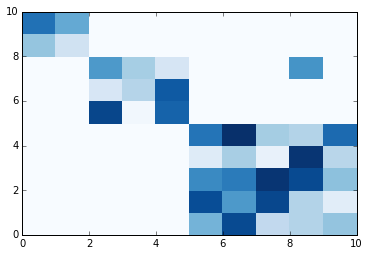

In [7]:
plt.pcolor(Alpha_truth[::-1],cmap=plt.cm.Blues)
plt.show()
plt.close()

In [8]:
_, s, _ = np.linalg.svd(Alpha_truth)
print(s.max())
assert s.max() < 1, "Alpha_truth cannot generate a stable Hawkes process"

0.940789687311


In [9]:
kernels = [[hk.HawkesKernelExp(a, b) for (a, b) in zip(a_list, b_list)] for (a_list, b_list) in zip(Alpha_truth, Beta)]
h = hk.Hawkes(kernels=kernels, mus=list(mus))
h.simulate(1000000)
estim = Estim(h)

## Correlation matrix

In [10]:
from admm_hawkes.utils import corr_matrix
Corr = corr_matrix(estim)

/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


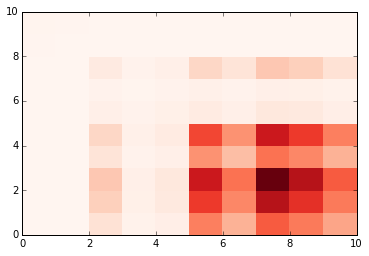

In [11]:
plt.pcolor(Corr[::-1],cmap=plt.cm.Reds)
plt.show()
plt.close()

# Estimation procedure

In [12]:
from admm_hawkes.solver import admm
import admm_hawkes.prox as prox
X0 = np.eye(d)
#X0 = np.ones(d**2).reshape(d,d)
rho = 0.01

## objective = squared Frobenius

In [13]:
# main step
X_frob = admm(estim, prox.sq_frob, X0, X0, Alpha_truth, rho=rho, maxiter=10000)

||X1 - X_2|| =  1.16474880367e-07
||X2 - X_3|| =  6.74152479374e-16
||U1|| =  0.00428370413027
||U2|| =  0.0239646618604
||U3|| =  4.29753247318e-16
||U4|| =  0.0301922420908
||U5|| =  0.0081567310118


/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/IPython/kernel/__main__.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  from IPython.kernel.zmq import kernelapp as app


/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


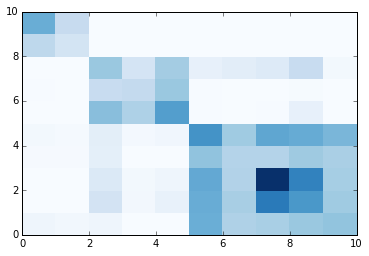

In [14]:
plt.pcolor(X_frob[::-1],cmap=plt.cm.Blues)
plt.show()
plt.close()

## objective = \ell_1 norm

In [15]:
# main step
X_l1 = admm(estim, prox.l1, X0, X0, Alpha_truth, rho=rho, maxiter=10000)

||X1 - X_2|| =  1.55267498393e-09
||X2 - X_3|| =  1.73445409259e-15
||U1|| =  0.0242651477827
||U2|| =  0.00461777325752
||U3|| =  1.6050243142e-15
||U4|| =  0.149259986479
||U5|| =  0.0592020191155


/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/IPython/kernel/__main__.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  from IPython.kernel.zmq import kernelapp as app


/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


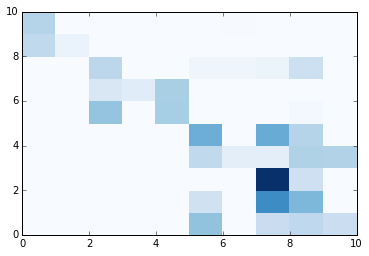

In [16]:
plt.pcolor(X_l1[::-1],cmap=plt.cm.Blues)
plt.show()
plt.close()

## objective = nuclear norm

In [17]:
# main step
X_nuc = admm(estim, prox.nuclear, X0, X0, Alpha_truth, rho=rho, maxiter=10000)

||X1 - X_2|| =  7.50673193339e-10
||X2 - X_3|| =  7.07837153325e-16
||U1|| =  0.0116148561888
||U2|| =  0.0936200773428
||U3|| =  8.28207377517e-16
||U4|| =  0.10367194104
||U5|| =  0.0406146128082


/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/IPython/kernel/__main__.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  from IPython.kernel.zmq import kernelapp as app


/Users/massil/anaconda/envs/py3k/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


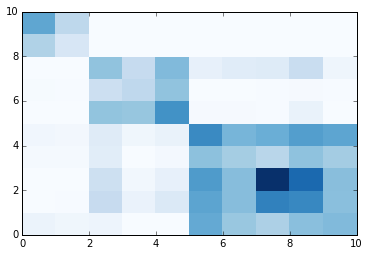

In [18]:
plt.pcolor(X_nuc[::-1],cmap=plt.cm.Blues)
plt.show()
plt.close()